# Ejercicio 4

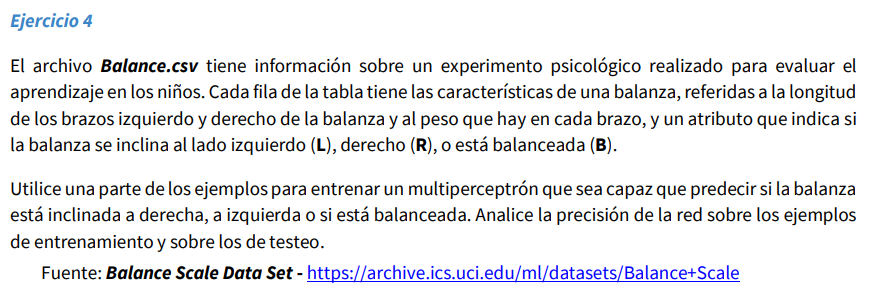

### Importe de datos y librerias

In [1]:

# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [5]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

nombre_archivo = DATOS_DIR + 'Balance.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'], sep=',')

df.head()

,Balance,LeftWeight,LeftDist,RightWeight,RightDist
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics, model_selection

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
from sklearn.neural_network import MLPClassifier
from Funciones import evaluar, evaluarDerivada

### Ejercicio

In [6]:
df.head()

,Balance,LeftWeight,LeftDist,RightWeight,RightDist
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [7]:
df['Balance'].unique()

array(['B', 'R', 'L'], dtype=object)

In [8]:
X = np.array(df.iloc[:, 1:])
Y = np.array(df['Balance'])

In [9]:
entradas = X.shape[1]
salidas = len(np.unique(Y))
print(entradas)
print (salidas)

4
3


In [10]:
#conjuntos de entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( \
        X,Y, test_size=0.30)#, random_state=42)

normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

In [11]:
clf = MLPClassifier(solver='sgd', learning_rate_init=0.05,
                    hidden_layer_sizes=(2,), random_state=1,
                    max_iter=2000, 
                    verbose=False,  tol=1.0e-05,
                    activation='tanh')

history = clf.fit(X_train,Y_train)

In [12]:
Y_pred = clf.predict(X_train)
print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_train,Y_pred))

% aciertos X_train : 0.915


In [13]:
report = metrics.classification_report(Y_train,Y_pred)
print("Confusion matrix Training:\n%s" % report) 

Confusion matrix Training:
              precision    recall  f1-score   support

           B       0.58      0.68      0.62        37
           L       0.97      0.92      0.95       187
           R       0.94      0.95      0.94       213

    accuracy                           0.92       437
   macro avg       0.83      0.85      0.84       437
weighted avg       0.92      0.92      0.92       437

